https://medium.com/beyondminds/an-introduction-to-super-resolution-using-deep-learning-f60aff9a499d
dataset can be found here: https://www.kaggle.com/olgabelitskaya/flower-color-images
tensorflow code can be found here: https://www.tensorflow.org/hub/tutorials/image_enhancing
another super resolution link that might be a little above my level: https://towardsdatascience.com/deep-learning-based-super-resolution-without-using-a-gan-11c9bb5b6cd5

In [1]:
import tensorflow as tf
import numpy as np
import os
import time
from PIL import Image
import tensorflow_hub as hub

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import itertools
from tensorflow import keras
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"
from PIL import Image

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.version.VERSION
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Importing the data

In [4]:
base_dir = os.path.join(os.getcwd(), os.pardir, "flowers","flowers")

In [5]:
flower_pictures = os.listdir(base_dir)
print(flower_pictures[:10])

['00_001.png', '00_002.png', '00_003.png', '00_004.png', '00_005.png', '00_006.png', '00_007.png', '00_008.png', '00_009.png', '00_010.png']


In [6]:
print("Dataset contains " + str(len(flower_pictures)) + " pictures")

Dataset contains 603 pictures


In [8]:
# Loads image from path and preprocesses to make it model ready
def preprocess_image(image_path):
    # reads file from image path and decodes image as a tf EagerTensor
    hr_image = tf.image.decode_image(tf.io.read_file(image_path))
    # the model I'm using only supports images with 3 color channels
    # my dataset is composed of png files which have 4 color chanels, so I'm going to remove the alpha channel to have 3 channels
    hr_image = hr_image[...,:-1]
    # cast to float32 instead of int
    hr_image = tf.cast(hr_image, tf.float32)
    # add a dimension to the beginning
    hr_image = tf.expand_dims(hr_image, 0)
    return hr_image

In [9]:
# ensures the image is in the correct Image.Image format, then saves the image as a jpg
def save_image(image, filename):
    # checking if image is type Image.Image (values between 0-255 and of type uint8)
    if not isinstance(image, Image.Image):
    # modifying the image to have values between 0-255 and to be of type unint8
        image = tf.clip_by_value(image, 0, 255)
        image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
    # save the image as a jpg using the name specified
    image.save("%s.jpg" % filename)
    print("Saved as %s.jpg" % filename)

In [62]:
# plots the image
def plot_image(image, title=""):
    # converting to int32 since images with type int can have values between 0-255
    # whereas images with type float can have values between 0-1
    image = tf.cast(image, tf.int32).numpy()
    # clipping the image to ensure it is within the range of 0-255
    image = tf.clip_by_value(image, 0, 255)
    # altering the figure size to be slightly larger, in order to better see the blurriness/sharpness of the image
    plt.figure(figsize=(5, 5))
    # showing the image
    plt.imshow(tf.squeeze(image))
    # removing the axes from view
    plt.axis("off")
    # titling the plot
    plt.title(title)

In [95]:
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
model = hub.load(SAVED_MODEL_PATH)

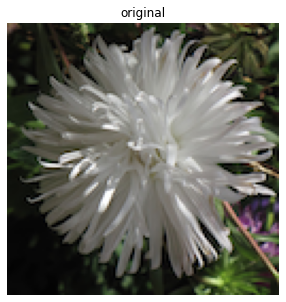

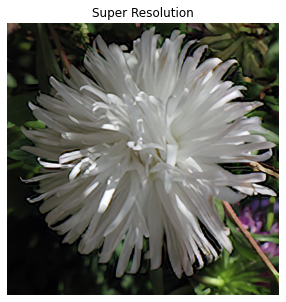

In [111]:
image_1 = os.path.join(base_dir, flower_pictures[555])
hr_image = preprocess_image(image_1)
plot_image(hr_image, "original")

fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
plot_image(tf.squeeze(fake_image), title= "Super Resolution")

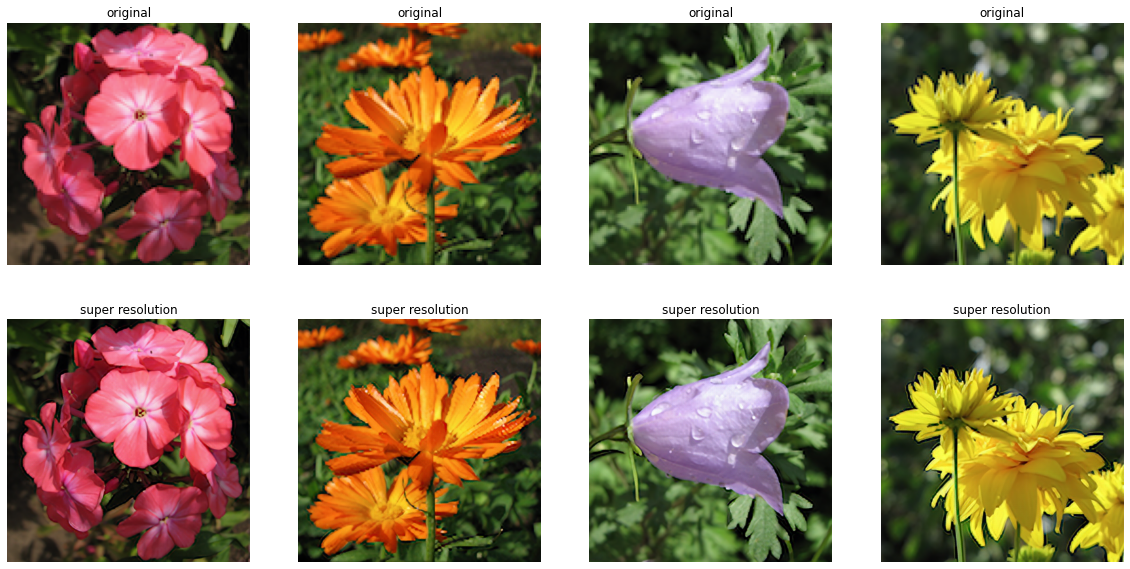

In [107]:
n = 4 # how many pictures to display
plt.figure(figsize=(20, 10))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    image_path = os.path.join(base_dir, flower_pictures[i*100])
    image = preprocess_image(image_path)
    image2 = tf.cast(image, tf.int32).numpy()
    image2 = tf.clip_by_value(image2, 0, 255)
    plt.imshow(tf.squeeze(image2))
    plt.axis("off")
    plt.title("original")
    
    ax = plt.subplot(2, n, i + 1 + n )
    hd_image = model(image)
    hd_image = tf.squeeze(hd_image)
    hd_image = tf.cast(hd_image, tf.int32).numpy()
    hd_image = tf.clip_by_value(hd_image, 0, 255)
    plt.imshow(tf.squeeze(hd_image))
    plt.axis("off")
    plt.title("super resolution")

In [112]:
image_path = os.path.join(base_dir, flower_pictures[256])
image = preprocess_image(image_path)

In [168]:
def downscale_image(image):
    image_size = []
    image = tf.squeeze(image)
    image_size = [image.shape[1], image.shape[0]]
    # ensuring that the image intensities are within the bounds 0-255 and that each value is an int
    image = tf.cast(tf.clip_by_value(image, 0, 255), tf.uint8)
    # resizing the image to 25% of the size using cubic spline interpolation (Image.BICUBIC)
    lr_image = np.asarray(Image.fromarray(image.numpy()).resize([image_size[0] // 4, image_size[1] // 4], Image.BICUBIC))
    return lr_image

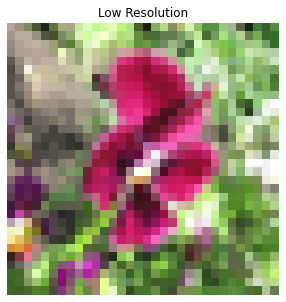

In [176]:
# downscaling and plotting low resolution image
low_res_image = downscale_image(image)
plot_image(low_res_image, title = "Low Resolution")

In [183]:
type(Image.fromarray(low_res_image))

PIL.Image.Image

In [191]:
# improving the resolution of the image
# image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
#test2 = Image.fromarray(tf.cast(low_res_image, tf.uint8).numpy())
new_image = model(tf.cast(tf.expand_dims(low_res_image, 0), tf.float32))
#new_image = tf.squeeze(new_image)
#plot_image(fake_image, title="Super Resolution")

In [187]:
low_res_image.shape()

TypeError: 'tuple' object is not callable

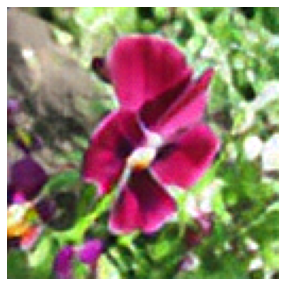

In [192]:
plot_image(new_image)